In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

%run graphing_function_recent.ipynb

In [2]:
#Use this for all adjustable values 
#input file paths here (include .csv):
video_path = r'\\10.25.16.5\yaochen\Active\DLC\Final_Models\Lindsey\escape_behavior_2-lindsey_christinger-2024-06-13_v1\V3_Tested2\coords_csv\CoordV3_M7_P2_6_22_24_videoDLC_resnet50_escape_behavior_2Jun13shuffle1_1030000_filtered_day.csv'
time_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\V3_updated\Timestamp\M7_P2_6_22_24_timestamp0.csv'
audio_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\V3_updated\Audio\M7_P2_6_22_24_audio.wav'

#input coordinates for the shelter and platform 
north_pixel = 26
south_pixel = 462
east_pixel = 570
west_pixel = 101
shelter_x_pixel = 539
shelter_y_pixel = 243

#input info from time_and_audio info notebook (either from audacity or bonsai)
stimulus_start = 295.824 #stimulus start time
stimulus_end = 303.006 #stimulus end time
escape_done = 297.8 #time mouse reaches shelter location

In [3]:
#manually decide?
escape_response = True
freezing_response = False

In [4]:
#read in DLC data, convert to cm, center platform at 0,0
shelter_x, shelter_y, x_diam, y_diam, coord_scaled = single_mouse_data(north_pixel, south_pixel, east_pixel, west_pixel, shelter_x_pixel, shelter_y_pixel, video_path)

In [5]:
#replace any head, nose, or center points with likelihood < .9 with NA
filter_data(.8, coord_scaled)

In [6]:
#coord_filtered

In [7]:
coord_scaled

Unnamed: 0  frames     nose_x     nose_y  nose_likelihood     head_x  \
0              0       0  -7.231073 -22.342905         0.999980  -6.245523   
1              1       1  -7.165620 -22.342905         0.999984  -6.205950   
2              2       2  -7.153959 -22.342905         0.999981  -6.199425   
3              3       3  -7.148219 -22.370540         0.999982  -6.192359   
4              4       4  -7.143365 -22.377861         0.999985  -6.187827   
...          ...     ...        ...        ...              ...        ...   
7698        7698    7698  29.364433   9.728235         0.000259  29.796802   
7699        7699    7699  29.364433   9.728235         0.000181  29.796802   
7700        7700    7700  29.364433   9.728235         0.000174  29.796802   
7701        7701    7701  29.364433   9.728235         0.000170  29.796802   
7702        7702    7702  29.364433   9.728235         0.000185  29.796802   

         head_y  head_likelihood  earRight_x  earRight_y  ...  \
0    -23.898379         0.999994   -6.902416  -24.506803  ...   
1    -23.898379         0.999995   -6.883562  -24.506803  ...   
2    -23.898379         0.999996   -6.872115  -24.506803  ...   
3    -23.919417         0.999995   -6.867920  -24.518449  ...   
4    -23.925865         0.999996   -6.867423  -24.521340  ...   
...         ...              ...         ...         ...  ...   
7698  11.092396         0.000454  -30.402765   -0.624683  ...   
7699  11.092396         0.001778  -30.358848   -0.624683  ...   
7700  11.092396         0.000384  -30.335001   -0.604586  ...   
7701  11.092396         0.000763  -30.335001   -0.604586  ...   
7702  11.092396         0.000620  -30.358848   -0.698111  ...   

      spine1_likelihood   center_x   center_y  center_likelihood   spine2_x  \
0              0.999999  -4.214532 -25.608338           0.999999  -2.863404   
1              0.999999  -4.173232 -25.608338           0.999999  -2.809918   
2              0.999999  -4.165298 -25.608338           0.999999  -2.792803   
3              0.999999  -4.161817 -25.614269           0.999999  -2.777347   
4              0.999999  -4.161372 -25.614269           0.999999  -2.775565   
...                 ...        ...        ...                ...        ...   
7698           0.000005  28.666903  12.865403           0.000311  23.631219   
7699           0.000009  28.666903  12.865403           0.000302  23.659686   
7700           0.000006  28.666903  12.865403           0.000245  23.659686   
7701           0.000009  28.666903  12.865403           0.000290  23.646429   
7702           0.000007  28.666903  12.865403           0.000195  23.646429   

       spine2_y  spine2_likelihood   spine3_x   spine3_y  spine3_likelihood  
0    -26.127659           1.000000  -1.728468 -26.179159           0.999999  
1    -26.114904           1.000000  -1.694765 -26.179159           0.999999  
2    -26.106220           1.000000  -1.682389 -26.175574           0.999999  
3    -26.106220           1.000000  -1.672752 -26.175574           0.999999  
4    -26.108872           1.000000  -1.659808 -26.175574           0.999999  
...         ...                ...        ...        ...                ...  
7698 -33.287939           0.000010 -29.585688   0.468299           0.000036  
7699 -33.322936           0.000018 -29.585688   0.552287           0.000057  
7700 -33.324525           0.000011 -29.585688   0.552287           0.000034  
7701 -33.324525           0.000014 -29.677354   0.552287           0.000039  
7702 -33.341610           0.000012 -30.111460   0.493989           0.000054  

[7703 rows x 26 columns]

In [8]:
#convert timestamps to zeroed seconds
convert_time(time_path, coord_scaled)

In [9]:
#REPLACE ONCE WE HAVE STIMULUS TIMESTAMPS
#returns start and stop times of stimulus.
start, stimulus_end = audio_timing(stimulus_start, stimulus_end, audio_path, coord_scaled['time'].iloc[-1])

In [10]:
#find time stimulus ends and mouse reaches shelter(escape) if stimulus is set to 0s
end, escape = time_set_zero(start, stimulus_end, escape_done, coord_scaled)

In [11]:
#calculate displacement as 'displacement'
displacement(shelter_x, shelter_y, coord_scaled)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [12]:
#calculate speed as 'speed' and change in displacement as 'delta_vector'
total_distance = speed(coord_scaled)

In [13]:
#calculate head angle as 'head_angle'
angle(shelter_x, shelter_y, coord_scaled)

In [14]:
#calculate head angle speed as 'angle_speed'
angle_speed(coord_scaled)

In [15]:
#create dataframes isolated to 4 ranges: just shelter reaching, 3 seconds before and 6 after, 2 before and 4 after, and 1 where you can input your own parameters
#return 4 dataframes 
escape_only, four_second, six_second, long_range = dataframe_ranges(-15, 30, escape,coord_scaled)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

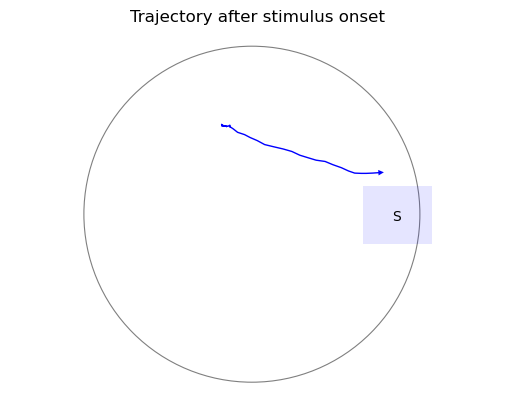

In [16]:
trajectory(shelter_x, shelter_y, x_diam, y_diam, escape_only)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

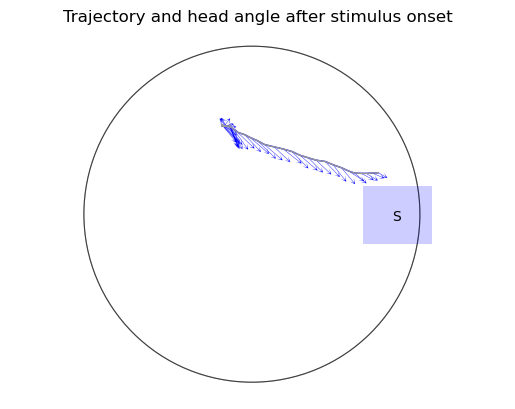

In [17]:
head_angle_trajectory_figure(shelter_x, shelter_y, x_diam, y_diam, escape_only)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

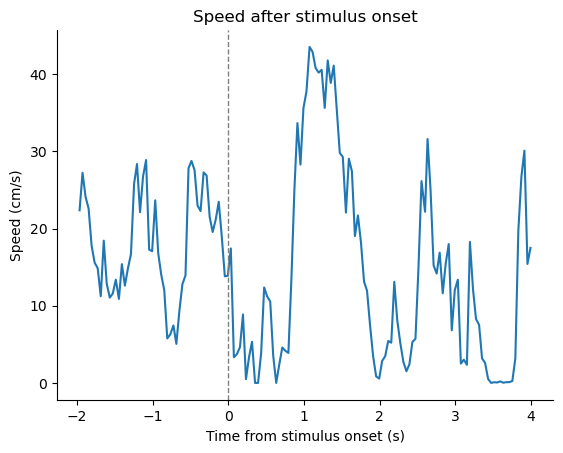

In [18]:
speed_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

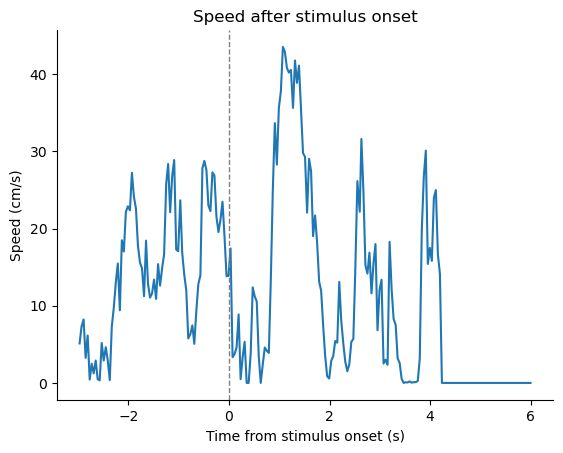

In [19]:
speed_figure(six_second['time_set'].iloc[-1],4, six_second)


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

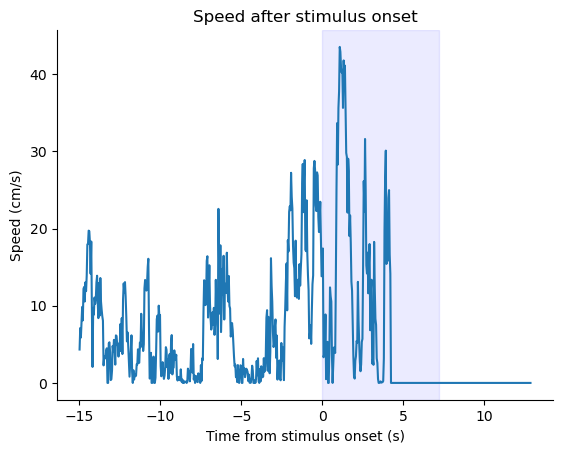

In [20]:
speed_figure(end,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

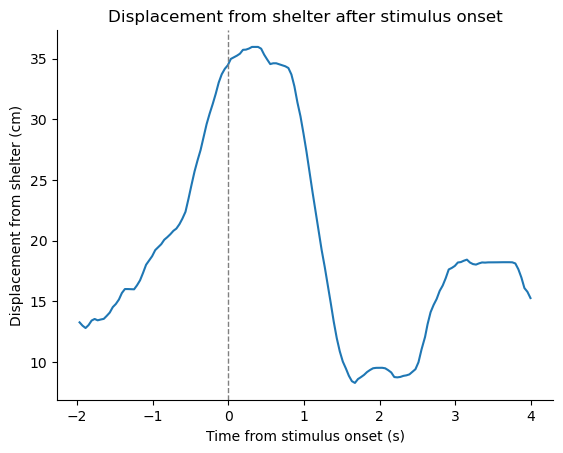

In [21]:
displacement_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

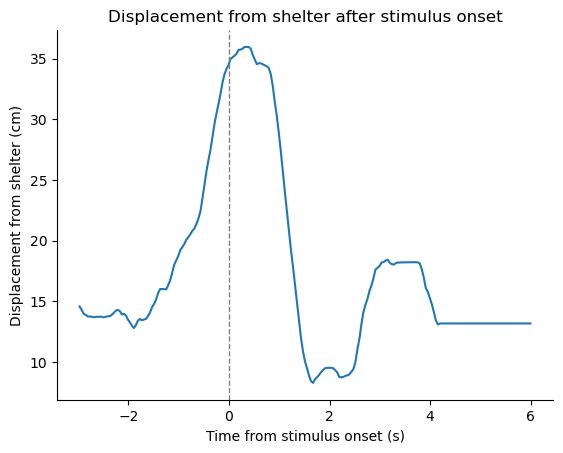

In [22]:
displacement_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

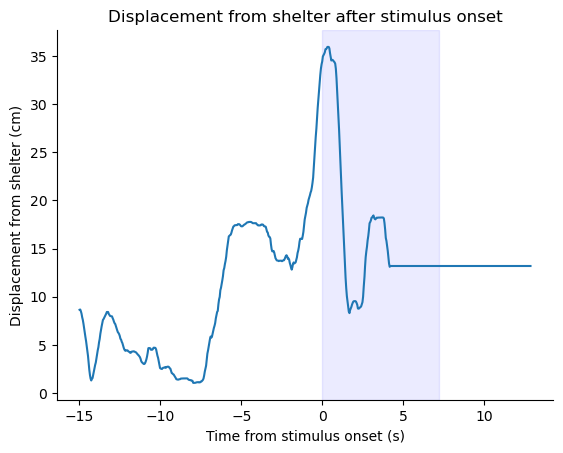

In [23]:
displacement_figure(end,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

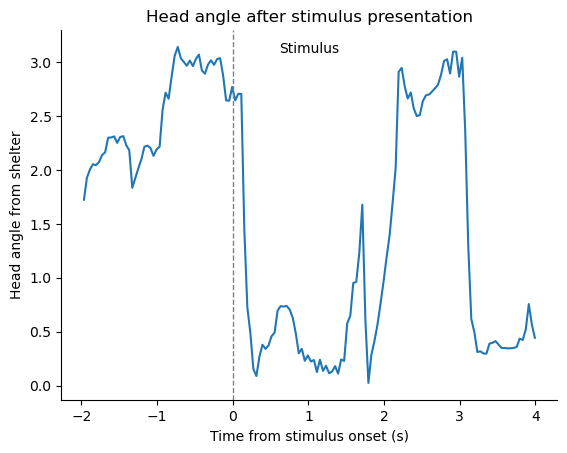

In [24]:
head_angle_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

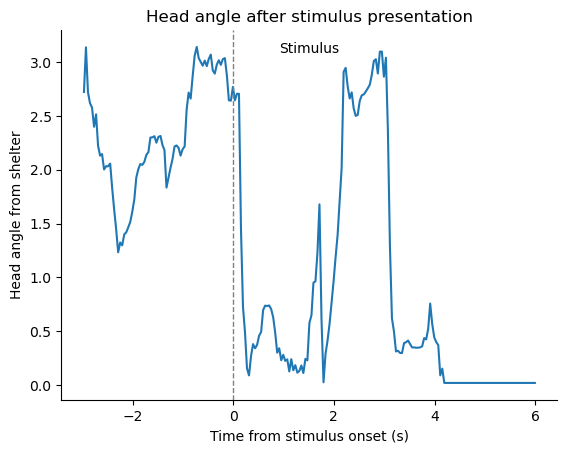

In [25]:
head_angle_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

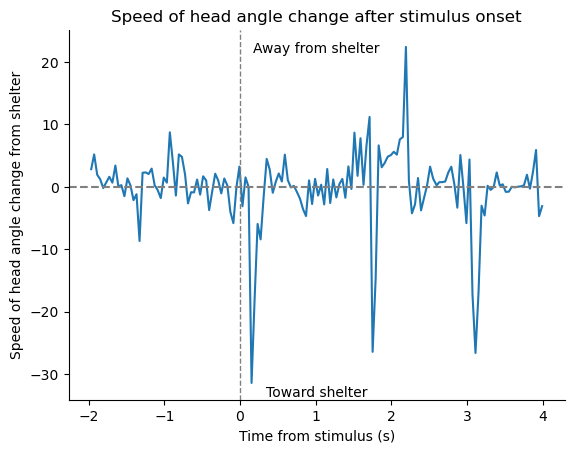

In [26]:
angle_speed_figure(four_second['time_set'].iloc[-1], 4,four_second)

In [27]:
ratio, initial_displacement, total_distance = linearity_ratio(escape_only)

In [28]:
likelihood_data, likelihood_minus_nose, likelihood_center = likelihood_check(0, 8, .9, coord_scaled)

In [29]:
likelihood_data #need to adjust time frame to be useful 

Unnamed: 0  frames     nose_x    nose_y  nose_likelihood     head_x  \
7425        7425    7425  28.129980  8.907314         0.198026  27.893577   
7426        7426    7426  28.021496  9.132472         0.005518  28.139391   
7427        7427    7427  27.913012  9.357631         0.001821  28.377482   
7428        7428    7428  27.804528  9.582789         0.001005  28.518231   
7429        7429    7429  27.696044  9.807948         0.000748  28.573356   
...          ...     ...        ...       ...              ...        ...   
7577        7577    7577  29.364433  9.728235         0.000159  29.796802   
7578        7578    7578  29.364433  9.728235         0.000200  29.796802   
7579        7579    7579  29.364433  9.728235         0.000225  29.796802   
7580        7580    7580  29.364433  9.728235         0.000146  29.796802   
7581        7581    7581  29.364433  9.728235         0.000146  29.796802   

         head_y  head_likelihood  earRight_x  earRight_y  ...   spine3_x  \
7425   9.376556         0.999994   27.682119   10.194781  ...  21.777581   
7426   9.975124         0.999874   27.830593   10.738659  ...  22.120011   
7427  10.275354         0.998641   28.149434   10.961441  ...  22.811548   
7428  10.626179         0.997393   28.254460   11.288826  ...  23.182600   
7429  10.738625         0.995515   28.327486   11.437218  ...  23.254388   
...         ...              ...         ...         ...  ...        ...   
7577  11.092396         0.011828   22.552579  -31.353415  ...  23.634363   
7578  11.092396         0.011004   22.552579  -31.353415  ...  23.634363   
7579  11.092396         0.012792   22.557171  -31.353415  ... -29.447153   
7580  11.092396         0.011372   22.552579  -31.376826  ... -29.482135   
7581  11.092396         0.014289   22.542557  -31.348497  ... -29.500052   

       spine3_y  spine3_likelihood        time  time_set  displacement  \
7425   7.719479           0.999998  297.072973  1.752967      8.773522   
7426   7.719479           0.999998  297.113369  1.793363      8.955440   
7427   7.564063           0.999995  297.152934  1.832928      9.189206   
7428   7.553650           0.999999  297.192793  1.872787      9.360583   
7429   7.553650           0.999999  297.232832  1.912826      9.500713   
...         ...                ...         ...       ...           ...   
7577 -33.074598           0.000045  303.154457  7.834451     13.189891   
7578 -33.074598           0.000044  303.194944  7.874938     13.189891   
7579  -0.953210           0.000037  303.234368  7.914362     13.189891   
7580  -0.953210           0.000036  303.274649  7.954643     13.189891   
7581  -0.953210           0.000049  303.314585  7.994579     13.189891   

          speed  delta_vector  head_angle  angle_speed  
7425  18.165024      0.730089    0.615375   -26.441795  
7426  13.116999      0.529874    0.024749   -14.620896  
7427  11.942152      0.472491    0.287205     6.633538  
7428   7.481783      0.298216    0.411743     3.124472  
7429   3.501764      0.140207    0.564722     3.820743  
...         ...           ...         ...          ...  
7577   0.000000      0.000000    0.018820     0.000000  
7578   0.000000      0.000000    0.018820     0.000000  
7579   0.000000      0.000000    0.018820     0.000000  
7580   0.000000      0.000000    0.018820     0.000000  
7581   0.000000      0.000000    0.018820     0.000000  

[117 rows x 33 columns]

In [30]:
rotate, shelter_rotate_x, shelter_rotate_y = rotate_trajectory(shelter_x, shelter_y, escape_only)

In [31]:
normalized_df, shelter_normalized_x, shelter_normalized_y, combined_range = normalize_rotation(rotate, shelter_rotate_x, shelter_rotate_y)

In [32]:
#normalize the data in rotate as well as shelter x and y 

#try with combined range
def normalize_combined_range(rotate, shelter_rotate_x, shelter_rotate_y):
    normalized = pd.DataFrame()
    
    #these are all rotated but not normalized values 
    x = rotate['rotated_x']
    y = rotate['rotated_y']
    shelter_x = shelter_rotate_x
    shelter_y = shelter_rotate_y
    
    #add the shelter coordinates to the x and y arrays - include in the normalization range. Shelter should be at 0, 1
    x_with_shelter = np.append(x, shelter_x)
    y_with_shelter = np.append(y, shelter_y)
    
    #find the min, max and range in the whole dataset for normalization
    combined_min = min(x_with_shelter.min(), y_with_shelter.min())
    combined_max = max(x_with_shelter.max(), y_with_shelter.max())
    combined_range = combined_max - combined_min    
    
    #normalize all values 
    x_norm = (x - combined_min) / combined_range
    y_norm = (y - combined_min) / combined_range

    shelter_norm_x = (shelter_x - combined_min) / combined_range
    shelter_norm_y = (shelter_y - combined_min) / combined_range
    
    normalized['x'] = x_norm
    normalized['y'] = y_norm
    
    return normalized, shelter_norm_x, shelter_norm_y, combined_range

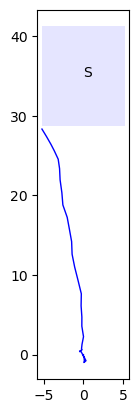

In [33]:
fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
    #make x and y scales equal - present as a circle


    #plot the center x and y coordinates
x = rotate['rotated_x']
y = rotate['rotated_y']

ax.text(shelter_rotate_x,shelter_rotate_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_rotate_x - 5.25), (shelter_rotate_y-6.25)), 10.5,12.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)


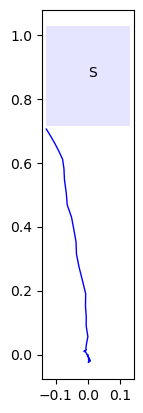

In [34]:

fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
x = normalized_df['x']
y = normalized_df['y']

ax.text(shelter_normalized_x,shelter_normalized_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_normalized_x - 5.25/combined_range), (shelter_normalized_y-6.25/combined_range)), 10.5/combined_range,12.5/combined_range,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)